<a href="https://colab.research.google.com/github/vanchanr/arXiv-analytics/blob/main/arXiv_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
keyword = input("Enter the keyword to search papers: ")

In [3]:
!pip3 install xmltodict
import xmltodict
import requests
import json
import time
import re
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
def cleanSpaces(s):
    s = s.replace('\n', ' ')
    s = re.sub(r'\s\s+', ' ', s)
    return s

def createPaper(paper):
    for field in ['author', 'category']:
        if type(paper[field]) is not list:
            paper[field] = [paper[field]]
    return {
        'title': cleanSpaces(paper['title']),
        'author': [author['name'] for author in paper['author']],
        'abstract': cleanSpaces(paper['summary']),
        'lastUpdated': paper['updated'],
        'category': [category['@term'] for category in paper['category']],
        'url': paper['id']
    }
def plotHelper(plotBy, countData):
    plt.bar(countData.keys(), countData.values())
    for key in countData:
        plt.text(key, countData[key], str(countData[key]), va='bottom', ha='center')
    plt.title(f'Number of {keyword} Papers by {plotBy}')
    plt.xlabel(plotBy)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.show()

def plotYearWise(jsonDump):
    yearCountData = {}
    for paper in jsonDump:
        lastUpdated = paper['lastUpdated']
        dt = datetime.strptime(lastUpdated, '%Y-%m-%dT%H:%M:%SZ')
        year = str(dt.year)
        if year in yearCountData:
            yearCountData[year] += 1
        else:
            yearCountData[year] = 1
    
    yearCountData = dict(sorted(yearCountData.items()))
    plotHelper('year', yearCountData)

#field: 'author', 'category'
#plot top 10
def plotFieldWise(jsonDump, field):
    if field in ['author', 'category']:
        data = {}
        for paper in jsonDump:
            for name in paper[field]:
                if name in data:
                    data[name] += 1
                else:
                    data[name] = 1
        data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True)[:10])
        plotHelper(field, data)

In [5]:
url = 'http://export.arxiv.org/api/query'
queryParams = {
    'search_query': 'all:"{}"'.format(keyword),
    'id_list': 'cs',
    'start': 0,
    'max_results': 200
}

outLs = []
batch = 1
while batch <= 10:
    try:
        resp = requests.get(url, params=queryParams)
        resp = xmltodict.parse(resp.text)
        resp = resp['feed']
        if 'entry' in resp:
            for paper in resp['entry']:
                paper = createPaper(paper)
                outLs.append(paper)
            print("Batch-{}: processed {} papers".format(batch, len(resp['entry'])))
        else:
            break
    except:
        print("Error while processing batch-{}".format(batch))
    batch += 1
    queryParams['start'] += 200
    time.sleep(0.5)
print("Total processed papers:", len(outLs))
try:
    with open('{}.json'.format(keyword), mode='w', encoding='utf-8') as jsonFile:
        json.dump(outLs, jsonFile, indent=2, ensure_ascii=False)
        print("Successfully created the json dump file !")
except:
    print("Error while creating json dump file")

Enter the keyword to search papers: Blockchain
Batch-1: processed 200 papers
Batch-2: processed 200 papers
Batch-3: processed 200 papers
Batch-4: processed 200 papers
Batch-5: processed 200 papers
Batch-6: processed 200 papers
Batch-7: processed 200 papers
Batch-8: processed 200 papers
Batch-9: processed 200 papers
Batch-10: processed 103 papers
Total processed papers: 1903
Successfully created the json dump file !


In [9]:
jsonDump = {}
with open(f'{keyword}.json', mode='r') as jsonFile:
    jsonDump = json.load(jsonFile)

Enter the filename without '.json': Blockchain


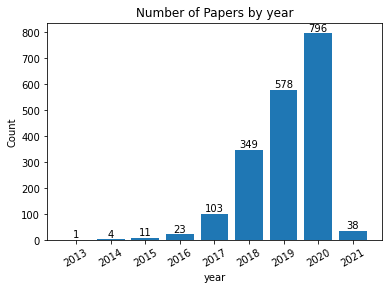

In [10]:
plotYearWise(jsonDump)

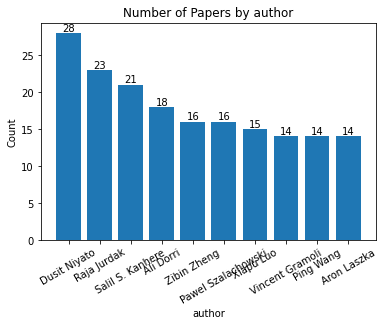

In [11]:
plotFieldWise(jsonDump, 'author')

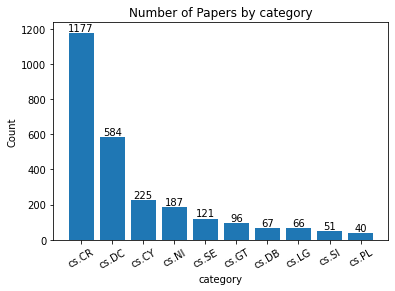

In [12]:
plotFieldWise(jsonDump, 'category')